## Requirements

pip install ipykernel numpy tensorflow scikit-learn



## Load input data

In [469]:
# Load in input data (DIY)
import numpy as np

def read_input_data(file_path):
    temp_list = []
    with open(file_path) as f:
        lines=f.readlines()
        for line in lines:
            line = line.split()
            if line:            
                line = [float(numbers) for numbers in line]
                temp_list.append(line)
    return np.array(temp_list)

method_A = read_input_data(r'data_source\test_data.txt')

# ------------------------------------------------------------

# Load in input data (Easier way)        
method_B = np.loadtxt(r'data_source\test_data.txt', delimiter=' ', dtype=float)


print((method_A==method_B).all())   
print(method_A.shape)
print(method_B.shape)

True
(100, 2)
(100, 2)


In [470]:
test_data = np.loadtxt(r'data_source\test_data.txt', delimiter=' ', dtype=float)
training_data = np.loadtxt(r'data_source\training_data.txt', delimiter=' ', dtype=float)
validation_data = np.loadtxt(r'data_source\validation_data.txt', delimiter=' ', dtype=float)

## Examine data

Offset added for better visibility

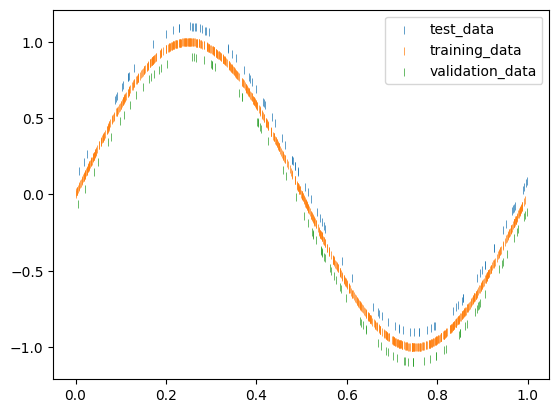

In [471]:

import matplotlib.pyplot as plt

plt.scatter(x = test_data[:,0] ,  y = test_data[:,1] + 0.1   ,marker="|" , label = "test_data"  , linewidths=0.5)
plt.scatter(x = training_data[:,0] ,  y = training_data[:,1] ,  marker="|" , label = "training_data" , linewidths=0.5 )
plt.scatter(x = validation_data[:,0] ,  y = validation_data[:,1] - 0.1 ,  marker="|" , label = "validation_data" , linewidths=0.5)
plt.legend()

## Regression problem

- No activation at the end
- MSE for loss function (typically for regression)
- Optimizer Rmsprop/Adagrad
- Custom metric implemented (mean_absolute_error_percentage)
- Model summary for debugging and deeper understanding


### Model definition

In [472]:
from keras import models
from keras import layers
import tensorflow as tf

def summary(model: tf.keras.Model) -> str:
  summary = []
  model.summary(print_fn=lambda x: summary.append(x))
  return '\n'.join(summary)

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  

#https://github.com/bnsreenu/python_for_microscopists/blob/master/tips_tricks_37_Understanding%20MAE%20and%20MSE.py
#https://stackoverflow.com/questions/52357542/attributeerror-tensor-object-has-no-attribute-numpy

 
X_train = training_data[:,0]
Y_train = training_data[:,1]
X_val = validation_data[:,0]
Y_val = validation_data[:,1]

model.summary()


Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_161 (Dense)           (None, 32)                64        
                                                                 
 dense_162 (Dense)           (None, 32)                1056      
                                                                 
 dense_163 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [473]:
test_data[ : , 1 ]

array([-0.59413172, -0.45307409, -0.82230611,  0.66874362,  0.22203742,
       -0.95868727,  0.71754437, -0.99999201,  0.11647421,  0.85577203,
        0.27205548,  0.66839621,  0.79208906,  0.50798952,  0.11387754,
        0.88250991,  0.99793372, -0.77891948, -0.53358159,  0.97288834,
       -0.0142831 ,  0.9987619 , -0.08652634, -0.99783273, -0.93279885,
        0.40576434, -0.98564704,  0.08913979, -0.97655003,  0.05415628,
       -0.17814815, -0.97750719,  0.54311298,  0.72668553, -0.20884497,
        0.9914954 ,  0.16348055,  0.99979487,  0.12666053, -0.29603011,
        0.59219933, -0.98617595, -0.86277403,  0.53137383, -0.64653821,
       -0.02648457, -0.30660164, -0.21499142,  0.82102055, -0.332195  ,
       -0.18985417,  0.6037806 , -0.32590131,  0.48379382, -0.88124256,
        0.6783237 ,  0.9953621 ,  0.98372481,  0.12712246, -0.96324784,
       -0.77906334, -0.97392646, -0.896103  ,  0.52085161,  0.63879271,
       -0.87234744,  0.96160156, -0.04910468, -0.56167609,  0.66

### Callbacks (not done yet)

In [474]:
# NOT DONE YET

"""""

class Metrics(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self._data = []

    def on_epoch_end(self, batch, logs={}):
        X_val, y_val = self.validation_data[0], self.validation_data[1]
        y_predict = np.asarray(model.predict(X_val))

        y_val = np.argmax(y_val, axis=1)
        y_predict = np.argmax(y_predict, axis=1)

        self._data.append({
            'val_rocauc': roc_auc_score(y_val, y_predict),
        })
        return

    def get_data(self):
        return self._data

metrics = Metrics()
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[metrics])
metrics.get_data()

"""


'""\n\nclass Metrics(keras.callbacks.Callback):\n    def on_train_begin(self, logs={}):\n        self._data = []\n\n    def on_epoch_end(self, batch, logs={}):\n        X_val, y_val = self.validation_data[0], self.validation_data[1]\n        y_predict = np.asarray(model.predict(X_val))\n\n        y_val = np.argmax(y_val, axis=1)\n        y_predict = np.argmax(y_predict, axis=1)\n\n        self._data.append({\n            \'val_rocauc\': roc_auc_score(y_val, y_predict),\n        })\n        return\n\n    def get_data(self):\n        return self._data\n\nmetrics = Metrics()\nhistory = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[metrics])\nmetrics.get_data()\n\n'

### Custom metric funtion implementation

In [475]:
#https://www.tensorflow.org/api_docs/python/tf/keras/metrics/mean_absolute_percentage_error

def percentage_metric(y_true, y_pred):
        result = (100. * np.mean(np.abs((y_true - y_pred) / y_true), axis=-1)) - 100
        
        #First value of all batch during the traning, can be observed during traning
        
        #print(f"Current true value:  {y_true[0].numpy()}  -- Current predicted value:  {y_pred[0].numpy()} \n")
        
        return result



### Setting up plots for monitoring the learning

In [523]:

import matplotlib.gridspec as gridspec

def training_plot(history , epoch , batch_size, model_summary = ""):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["mean_absolute_error"]
    val_acc = history.history["val_mean_absolute_error"]
    custom_perc = history.history['percentage_metric']
    val_custom_perc = history.history['val_percentage_metric']


    # Original solution
    #fig , [[loss_plot , acc_plot] , [custom_plot , placeholder]] = plt.subplots(2,2) 
    
    #https://stackoverflow.com/questions/37360568/python-organisation-of-3-subplots-with-matplotlib
    
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure()
    
    loss_plot = plt.subplot(gs[1, :]) 
    acc_plot = plt.subplot(gs[0, 0]) 
    custom_plot = plt.subplot(gs[0, 1]) 
    
    fig.set_figwidth(10)
    fig.set_figheight(6)

    
    loss_plot.set_xticks(range(1 , len(loss) + 1)) # Only dislpay Epochs
    acc_plot.set_xticks(range(1 , len(loss) + 1)) # Only dislpay Epochs

    loss_plot.plot(range(1, len(loss) + 1), loss ,label = "Traning Loss", marker = "o")
    loss_plot.plot(range(1, len(loss) + 1), val_loss, label = "Validation Loss" , marker = "o")
    loss_plot.set_xlabel("Epochs")
    loss_plot.set_ylabel("MSE")
    loss_plot.legend()


    acc_plot.plot(range(1, len(acc) + 1), acc ,label = "Traning MAE", marker = "o")
    acc_plot.plot(range(1, len(acc) + 1), val_acc, label = "Validation MAE" , marker = "o")
    acc_plot.set_xlabel("Epochs")
    acc_plot.set_ylabel("MAE")
    acc_plot.legend()

    custom_plot.plot(range(1, len(acc) + 1), custom_perc ,label = "Percentage Accuracy", marker = "o")
    custom_plot.plot(range(1, len(acc) + 1), val_custom_perc, label = "Validation Percentage Accuracy" , marker = "o")
    custom_plot.set_xlabel("Epochs")
    custom_plot.set_ylabel("Percentage Accuracy")
    custom_plot.legend()


    text = fig.text(0.50, 0.02, f'Epochs: {epoch} , Batch size: {batch_size} \n {model_summary}', horizontalalignment='center',  wrap=False ) 

    fig.tight_layout(rect=(0,.05,1,1)) 
    plt.show()


### Performing the initial learning

In [477]:

epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=1)

Epoch 1/10
80/80 [==============================] - 2s 19ms/step - loss: 0.3322 - mean_absolute_error: 0.4990 - percentage_metric: 23.4664 - val_loss: 0.2245 - val_mean_absolute_error: 0.3969 - val_percentage_metric: 79.8897
Epoch 2/10
80/80 [==============================] - 2s 20ms/step - loss: 0.1918 - mean_absolute_error: 0.3846 - percentage_metric: 15.4164 - val_loss: 0.1613 - val_mean_absolute_error: 0.3550 - val_percentage_metric: 92.5381
Epoch 3/10
80/80 [==============================] - 1s 19ms/step - loss: 0.1369 - mean_absolute_error: 0.3244 - percentage_metric: 34.5777 - val_loss: 0.1416 - val_mean_absolute_error: 0.3210 - val_percentage_metric: 112.9187
Epoch 4/10
80/80 [==============================] - 2s 19ms/step - loss: 0.1247 - mean_absolute_error: 0.2990 - percentage_metric: 38.7541 - val_loss: 0.1344 - val_mean_absolute_error: 0.3063 - val_percentage_metric: 113.4949
Epoch 5/10
80/80 [==============================] - 2s 19ms/step - loss: 0.1182 - mean_absolute_er

#### Content of the history varible

In [478]:
history.history


{'loss': [0.3321726620197296,
  0.19181941449642181,
  0.13693882524967194,
  0.12470603734254837,
  0.11823440343141556,
  0.11147217452526093,
  0.10390374064445496,
  0.09693199396133423,
  0.08850424736738205,
  0.08041854947805405],
 'mean_absolute_error': [0.4989880621433258,
  0.384608656167984,
  0.32439208030700684,
  0.2989646792411804,
  0.28863534331321716,
  0.2742336690425873,
  0.26377689838409424,
  0.2523266077041626,
  0.23483198881149292,
  0.21799999475479126],
 'percentage_metric': [23.466398239135742,
  15.416402816772461,
  34.577693939208984,
  38.75411605834961,
  40.44587707519531,
  28.595497131347656,
  22.335956573486328,
  19.409826278686523,
  13.65848159790039,
  1.8114243745803833],
 'val_loss': [0.2245103120803833,
  0.161284938454628,
  0.14161598682403564,
  0.1344408094882965,
  0.1386433094739914,
  0.1221873089671135,
  0.12060008198022842,
  0.10888379067182541,
  0.10092208534479141,
  0.09147913753986359],
 'val_mean_absolute_error': [0.3968869

### Showing the initial results

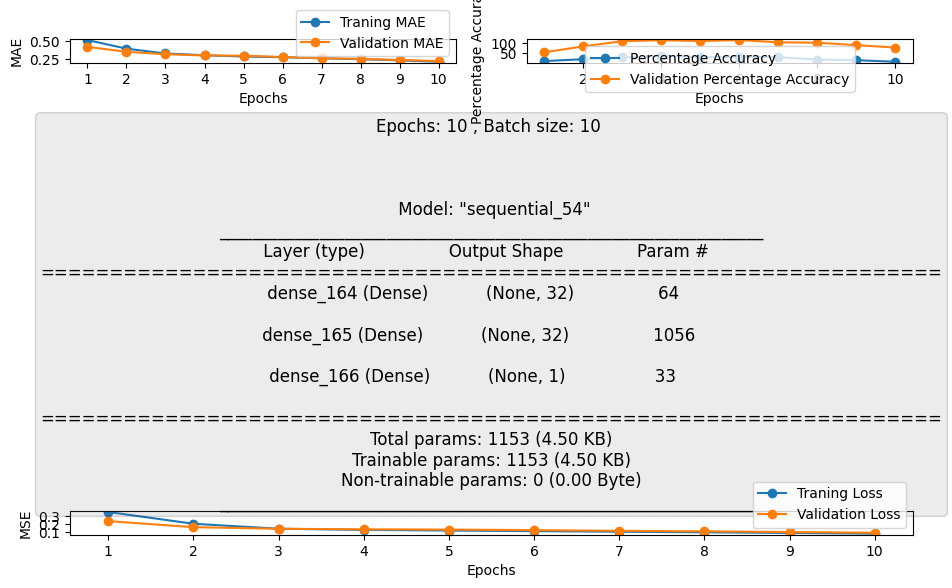

In [524]:
training_plot(history , epoch, batch_size, summary(model))

## Finetuning the model

Epoch 1/10
80/80 [==============================] - 2s 19ms/step - loss: 0.3536 - mean_absolute_error: 0.5162 - percentage_metric: 11.3636 - val_loss: 0.2386 - val_mean_absolute_error: 0.4234 - val_percentage_metric: 55.5400
Epoch 2/10
80/80 [==============================] - 2s 19ms/step - loss: 0.2052 - mean_absolute_error: 0.3986 - percentage_metric: 20.6790 - val_loss: 0.1624 - val_mean_absolute_error: 0.3554 - val_percentage_metric: 85.4458
Epoch 3/10
80/80 [==============================] - 1s 18ms/step - loss: 0.1428 - mean_absolute_error: 0.3322 - percentage_metric: 29.5901 - val_loss: 0.1421 - val_mean_absolute_error: 0.3221 - val_percentage_metric: 111.5680
Epoch 4/10
80/80 [==============================] - 1s 18ms/step - loss: 0.1279 - mean_absolute_error: 0.3077 - percentage_metric: 38.1958 - val_loss: 0.1353 - val_mean_absolute_error: 0.3050 - val_percentage_metric: 116.4165
Epoch 5/10
80/80 [==============================] - 1s 19ms/step - loss: 0.1200 - mean_absolute_er

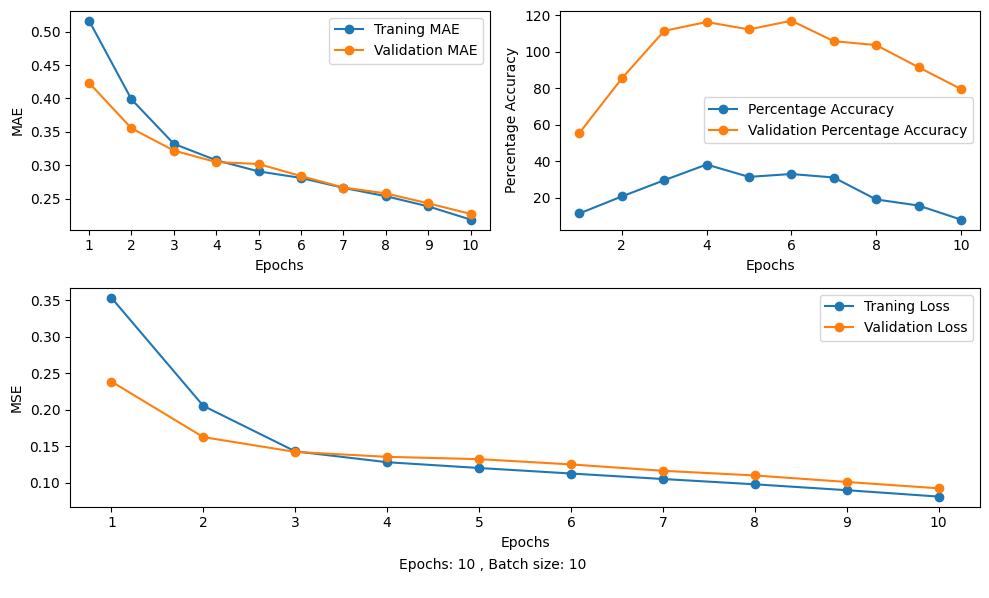

In [480]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  

epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=1)


training_plot(history , epoch, batch_size)

In [481]:
model.evaluate(test_data[:,0], test_data[:,1])


4/4 [==============================] - 0s 10ms/step - loss: 0.0949 - mean_absolute_error: 0.2211 - percentage_metric: 75.5125


[0.09488189965486526, 0.22109773755073547, 75.512451171875]

4/4 [==============================] - 0s 3ms/step


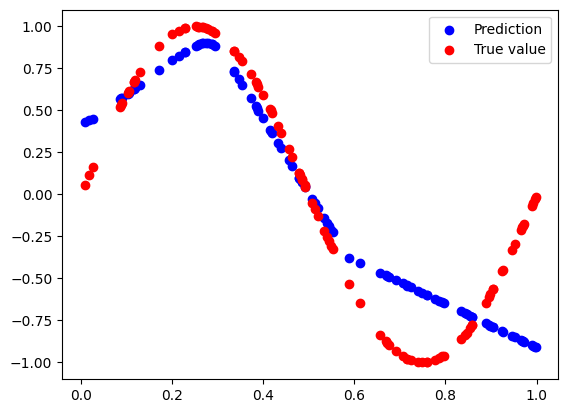

In [482]:
predictions = model.predict(test_data[:,0])
true_values = test_data[:,1]

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x = test_data[:,0], y = predictions, c='b',  label='Prediction')
ax1.scatter(x = test_data[:,0] , y = true_values,  c='r',  label='True value')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


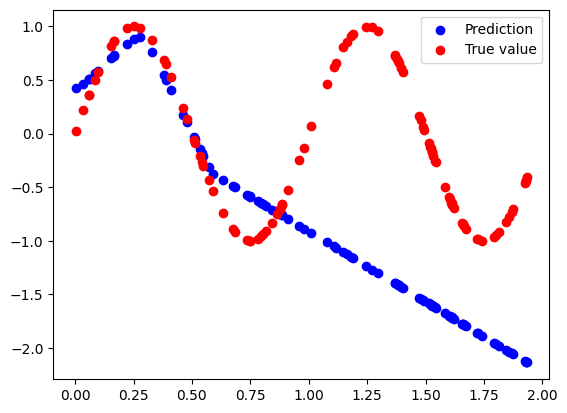

In [483]:
from random import random

lenght = 2

new_inputs = [(random() * lenght ) for i in range(100)]

predictions = model.predict(new_inputs)
true_values = [(np.sin(input * 2 * np.pi)) for input in new_inputs]


fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x = new_inputs, y = predictions, c='b',  label='Prediction')
ax1.scatter(x = new_inputs , y = true_values,  c='r',  label='True value')
plt.legend()
plt.show()